In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split 

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/%F0%9F%97%BA%EF%B8%8F%20Holiday_Package_Prediction/Travel.csv")

In [3]:
orginal = data.copy()

In [4]:
data.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

<BarContainer object of 4888 artists>

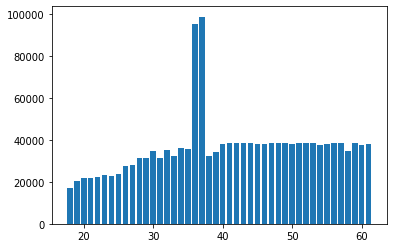

In [5]:
plt.bar(data.Age, data.MonthlyIncome)

In [6]:
data.shape

(4888, 20)

<AxesSubplot:ylabel='Age'>

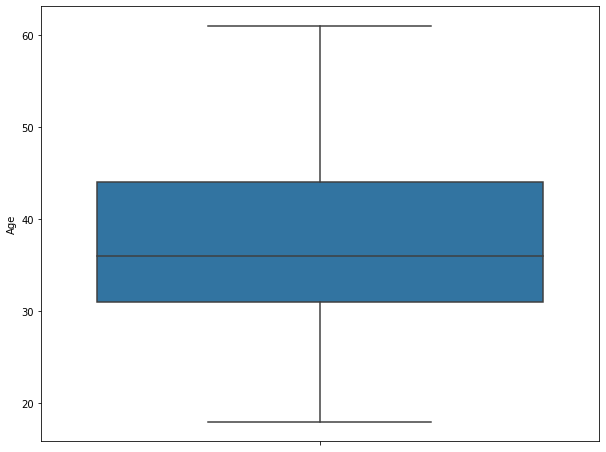

In [7]:
plt.figure(figsize = (10,8))
sns.boxplot(y = data.Age)

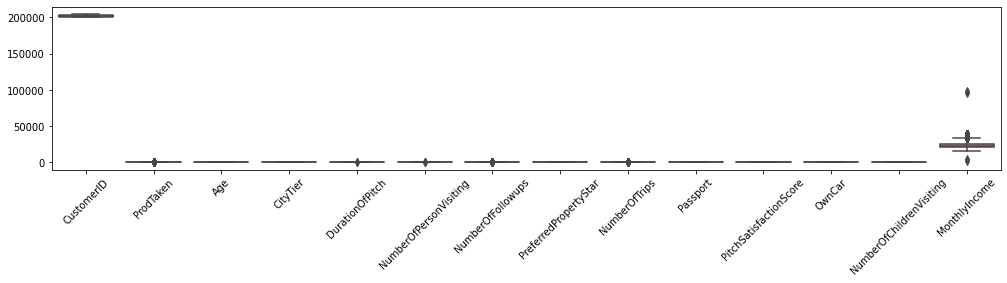

In [8]:
fig,ax = plt.subplots(1,figsize=(17,3))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.show()

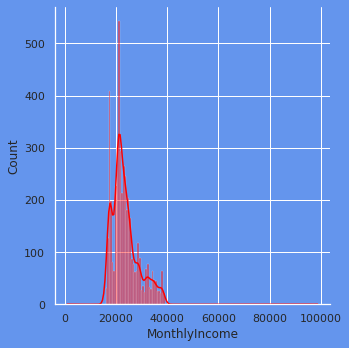

In [9]:
sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})

ax = sns.displot(data.MonthlyIncome, palette= 'rainbow', color = 'red', kde = True)

In [10]:
data.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

<AxesSubplot:>

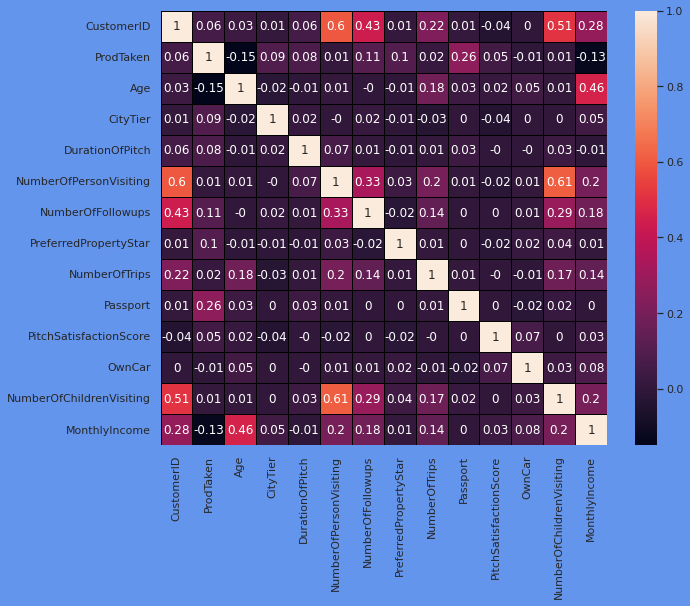

In [11]:
nu = data.select_dtypes('number')
plt.figure(figsize = (10, 8))
sns.heatmap(nu.corr().round(2), annot = True, linewidth = 1, linecolor = 'black')

In [12]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [13]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [14]:
cat = data.select_dtypes('object')
num = data.select_dtypes('number')
cat.head()
print(cat.shape)

(4888, 6)


In [15]:
num.head()
print(num.shape)

(4888, 14)


In [16]:
orginal.shape

(4888, 20)

In [17]:
cat.isnull().sum()

TypeofContact     25
Occupation         0
Gender             0
ProductPitched     0
MaritalStatus      0
Designation        0
dtype: int64

In [18]:
cat.head()

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,Self Enquiry,Salaried,Female,Deluxe,Single,Manager
1,Company Invited,Salaried,Male,Deluxe,Divorced,Manager
2,Self Enquiry,Free Lancer,Male,Basic,Single,Executive
3,Company Invited,Salaried,Female,Basic,Divorced,Executive
4,Self Enquiry,Small Business,Male,Basic,Divorced,Executive


AxesSubplot(0.125,0.125;0.775x0.755)
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64


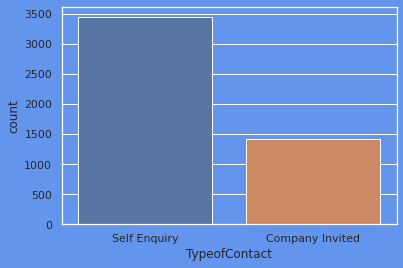

In [19]:
import warnings 
warnings.filterwarnings('ignore')

print(sns.countplot(cat.TypeofContact));

print(cat.TypeofContact.value_counts());

In [20]:
cat.TypeofContact = cat.TypeofContact.fillna(cat.TypeofContact.value_counts().index[0])
cat.TypeofContact.value_counts()

Self Enquiry       3469
Company Invited    1419
Name: TypeofContact, dtype: int64

In [21]:
cat.head()

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,Self Enquiry,Salaried,Female,Deluxe,Single,Manager
1,Company Invited,Salaried,Male,Deluxe,Divorced,Manager
2,Self Enquiry,Free Lancer,Male,Basic,Single,Executive
3,Company Invited,Salaried,Female,Basic,Divorced,Executive
4,Self Enquiry,Small Business,Male,Basic,Divorced,Executive


In [22]:
cat.TypeofContact.value_counts()

Self Enquiry       3469
Company Invited    1419
Name: TypeofContact, dtype: int64

In [23]:
dic = { 'Self Enquiry': 1, 'Company Invited': 0}
cat.TypeofContact = cat.TypeofContact.map(dic)
cat.Occupation.value_counts()

Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

In [24]:
dic = { 'Salaried': 3, 'Small Business': 2, 'Large Business': 1, 'Free Lancer': 0 }

cat.Occupation = cat.Occupation.map(dic)
cat.head()

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,1,3,Female,Deluxe,Single,Manager
1,0,3,Male,Deluxe,Divorced,Manager
2,1,0,Male,Basic,Single,Executive
3,0,3,Female,Basic,Divorced,Executive
4,1,2,Male,Basic,Divorced,Executive


In [25]:
dic = { 'Female': 1, 'Male': 2}

cat.Gender = cat.Gender.map(dic)
cat.ProductPitched.value_counts()

Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

In [26]:
dic = { 'Basic': 4, 'Deluxe': 3, 'Standard': 2, 'Super Deluxe': 1, 'King': 0}

cat.ProductPitched = cat.ProductPitched.map(dic)
cat.head()

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,1,3,1.0,3,Single,Manager
1,0,3,2.0,3,Divorced,Manager
2,1,0,2.0,4,Single,Executive
3,0,3,1.0,4,Divorced,Executive
4,1,2,2.0,4,Divorced,Executive


In [27]:
cat.MaritalStatus.value_counts()

Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

In [28]:
dic = { 'Married': 3, 'Divorced': 2, 'Single': 1, 'Unmarried': 0 }

cat.MaritalStatus = cat.MaritalStatus.map(dic)
cat.Designation.value_counts()

Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64

In [29]:
dic = { 'Executive': 4, 'Manager': 3, 'Senior Manager': 2, 'AVP': 1, 'VP': 0 }

cat.Designation = cat.Designation.map(dic)
cat.head()

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,1,3,1.0,3,1,3
1,0,3,2.0,3,2,3
2,1,0,2.0,4,1,4
3,0,3,1.0,4,2,4
4,1,2,2.0,4,2,4


In [30]:
cat.isnull().sum()

TypeofContact       0
Occupation          0
Gender            155
ProductPitched      0
MaritalStatus       0
Designation         0
dtype: int64

In [31]:
cat.Gender.isnull().sum()

155

<AxesSubplot:xlabel='Gender', ylabel='count'>

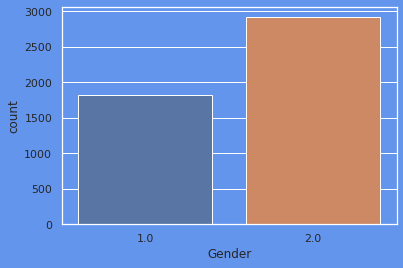

In [32]:
sns.countplot(cat.Gender)

In [33]:
cat.Gender = cat.Gender.fillna(1.0)
cat.isnull().sum()

TypeofContact     0
Occupation        0
Gender            0
ProductPitched    0
MaritalStatus     0
Designation       0
dtype: int64

In [34]:
cat.head()

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,1,3,1.0,3,1,3
1,0,3,2.0,3,2,3
2,1,0,2.0,4,1,4
3,0,3,1.0,4,2,4
4,1,2,2.0,4,2,4


In [35]:
num.head()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
0,200000,1,41.0,3,6.0,3,3.0,3.0,1.0,1,2,1,0.0,20993.0
1,200001,0,49.0,1,14.0,3,4.0,4.0,2.0,0,3,1,2.0,20130.0
2,200002,1,37.0,1,8.0,3,4.0,3.0,7.0,1,3,0,0.0,17090.0
3,200003,0,33.0,1,9.0,2,3.0,3.0,2.0,1,5,1,1.0,17909.0
4,200004,0,NaN,1,8.0,2,3.0,4.0,1.0,0,5,1,0.0,18468.0


In [36]:
num.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
CityTier                      0
DurationOfPitch             251
NumberOfPersonVisiting        0
NumberOfFollowups            45
PreferredPropertyStar        26
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
MonthlyIncome               233
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='count'>

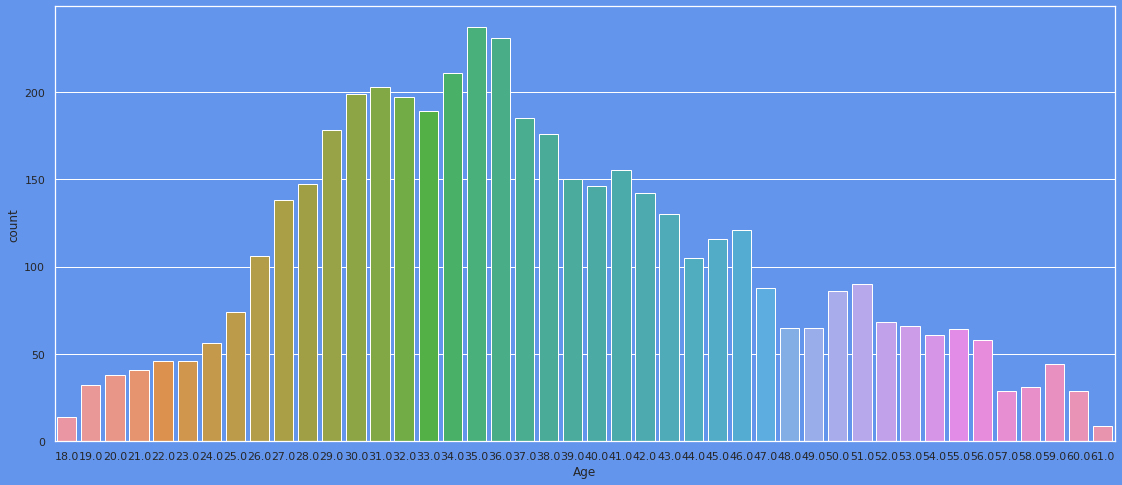

In [37]:
plt.figure(figsize = (19, 8))
sns.countplot(num.Age)

In [38]:
num.Age.mean()

37.62226512226512

<AxesSubplot:xlabel='DurationOfPitch', ylabel='count'>

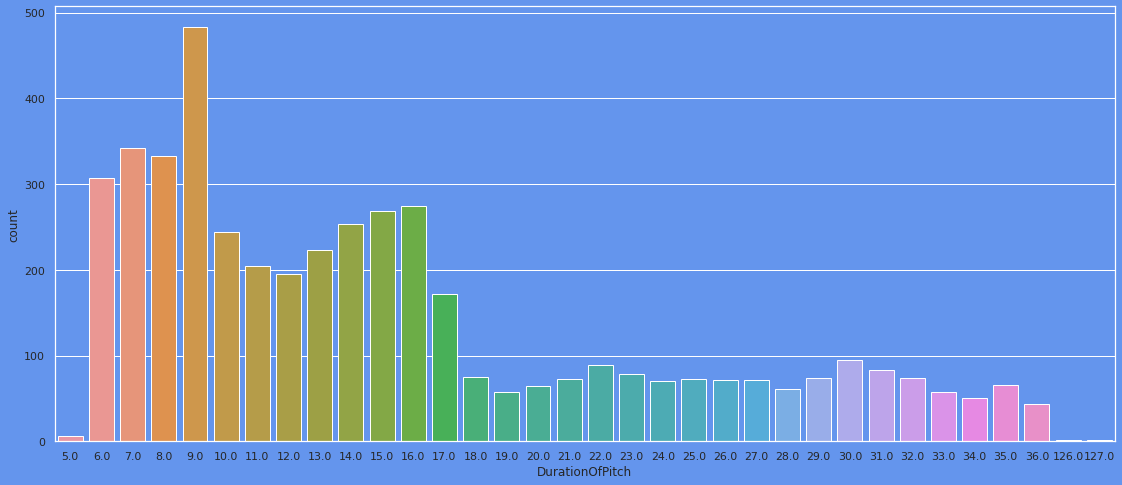

In [39]:
num.Age = num.Age.fillna(num.Age.mean())
plt.figure(figsize = (19, 8))
sns.countplot(num.DurationOfPitch)

In [40]:
num.DurationOfPitch.median()

13.0

In [41]:
num.DurationOfPitch = num.DurationOfPitch.fillna(num.DurationOfPitch.median())
num.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                           0
CityTier                      0
DurationOfPitch               0
NumberOfPersonVisiting        0
NumberOfFollowups            45
PreferredPropertyStar        26
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
MonthlyIncome               233
dtype: int64

<AxesSubplot:xlabel='NumberOfFollowups', ylabel='count'>

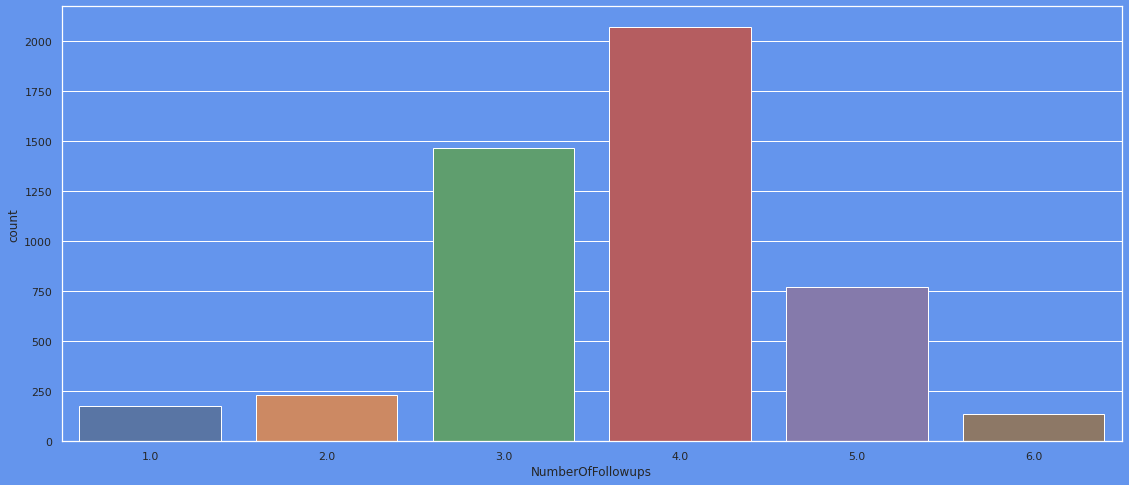

In [42]:
plt.figure(figsize = (19, 8))
sns.countplot(num.NumberOfFollowups)

<AxesSubplot:xlabel='PreferredPropertyStar', ylabel='count'>

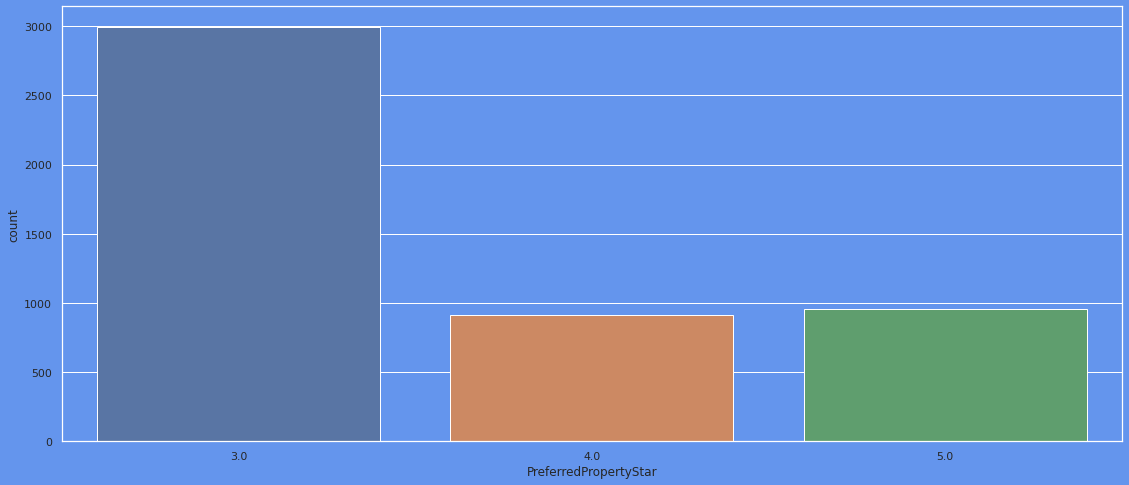

In [43]:
num.NumberOfFollowups = num.NumberOfFollowups.fillna(3.0)
plt.figure(figsize = (19, 8))
sns.countplot(num.PreferredPropertyStar)

In [44]:
num.PreferredPropertyStar = num.PreferredPropertyStar.fillna(4.0)
num.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                           0
CityTier                      0
DurationOfPitch               0
NumberOfPersonVisiting        0
NumberOfFollowups             0
PreferredPropertyStar         0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
MonthlyIncome               233
dtype: int64

<AxesSubplot:xlabel='NumberOfTrips', ylabel='count'>

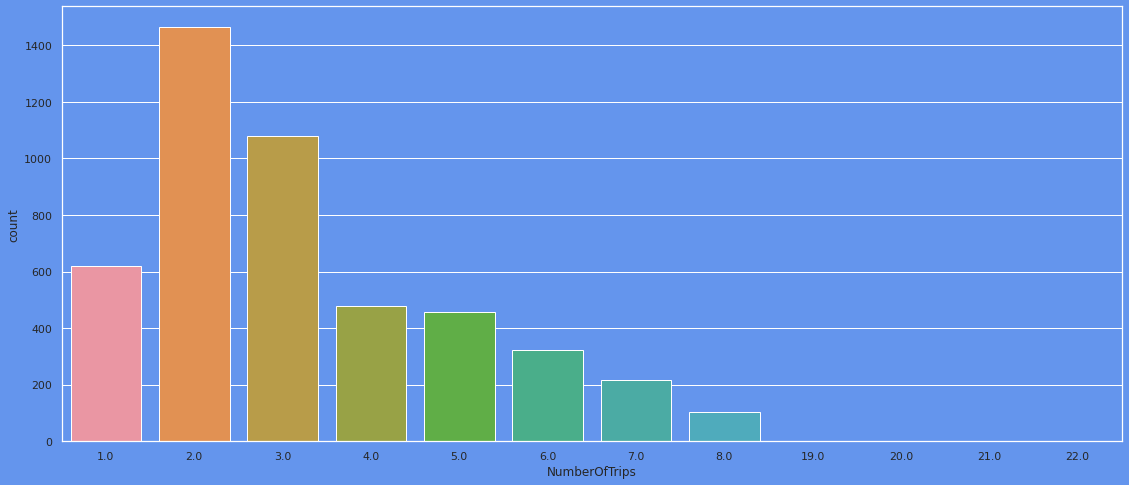

In [45]:
plt.figure(figsize = (19, 8))
sns.countplot(num.NumberOfTrips)

In [46]:
num.NumberOfTrips.mean()

3.236520640269587

<AxesSubplot:xlabel='NumberOfChildrenVisiting', ylabel='count'>

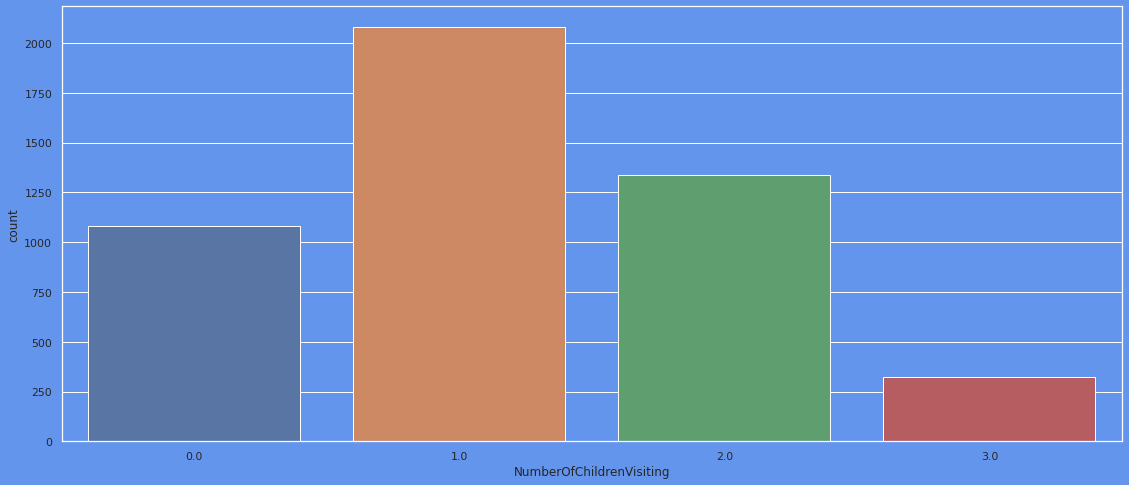

In [47]:
num.NumberOfTrips = num.NumberOfTrips.fillna(3.0)
plt.figure(figsize = (19, 8))
sns.countplot(num.NumberOfChildrenVisiting)

In [48]:
num.NumberOfChildrenVisiting.mean()

1.1872666943177106

In [49]:
num.NumberOfChildrenVisiting = num.NumberOfChildrenVisiting.fillna(1.0)
num.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                           0
CityTier                      0
DurationOfPitch               0
NumberOfPersonVisiting        0
NumberOfFollowups             0
PreferredPropertyStar         0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting      0
MonthlyIncome               233
dtype: int64

In [50]:
cat.head()

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,1,3,1.0,3,1,3
1,0,3,2.0,3,2,3
2,1,0,2.0,4,1,4
3,0,3,1.0,4,2,4
4,1,2,2.0,4,2,4


In [51]:
num.head()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
0,200000,1,41.000000,3,6.0,3,3.0,3.0,1.0,1,2,1,0.0,20993.0
1,200001,0,49.000000,1,14.0,3,4.0,4.0,2.0,0,3,1,2.0,20130.0
2,200002,1,37.000000,1,8.0,3,4.0,3.0,7.0,1,3,0,0.0,17090.0
3,200003,0,33.000000,1,9.0,2,3.0,3.0,2.0,1,5,1,1.0,17909.0
4,200004,0,37.622265,1,8.0,2,3.0,4.0,1.0,0,5,1,0.0,18468.0


In [52]:
Data_Good = pd.concat([num, cat], axis = 1)
Data_Good.head()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,200000,1,41.000000,3,6.0,3,3.0,3.0,1.0,1,2,1,0.0,20993.0,1,3,1.0,3,1,3
1,200001,0,49.000000,1,14.0,3,4.0,4.0,2.0,0,3,1,2.0,20130.0,0,3,2.0,3,2,3
2,200002,1,37.000000,1,8.0,3,4.0,3.0,7.0,1,3,0,0.0,17090.0,1,0,2.0,4,1,4
3,200003,0,33.000000,1,9.0,2,3.0,3.0,2.0,1,5,1,1.0,17909.0,0,3,1.0,4,2,4
4,200004,0,37.622265,1,8.0,2,3.0,4.0,1.0,0,5,1,0.0,18468.0,1,2,2.0,4,2,4


In [53]:
Data_Good.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                           0
CityTier                      0
DurationOfPitch               0
NumberOfPersonVisiting        0
NumberOfFollowups             0
PreferredPropertyStar         0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting      0
MonthlyIncome               233
TypeofContact                 0
Occupation                    0
Gender                        0
ProductPitched                0
MaritalStatus                 0
Designation                   0
dtype: int64

In [54]:
from sklearn.preprocessing import StandardScaler
x = Data_Good.drop(['MonthlyIncome', 'CustomerID'], axis = 1)
y = orginal.MonthlyIncome
y = orginal.MonthlyIncome.fillna(orginal.MonthlyIncome.mean())
x.head()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,1,41.000000,3,6.0,3,3.0,3.0,1.0,1,2,1,0.0,1,3,1.0,3,1,3
1,0,49.000000,1,14.0,3,4.0,4.0,2.0,0,3,1,2.0,0,3,2.0,3,2,3
2,1,37.000000,1,8.0,3,4.0,3.0,7.0,1,3,0,0.0,1,0,2.0,4,1,4
3,0,33.000000,1,9.0,2,3.0,3.0,2.0,1,5,1,1.0,0,3,1.0,4,2,4
4,0,37.622265,1,8.0,2,3.0,4.0,1.0,0,5,1,0.0,1,2,2.0,4,2,4


<AxesSubplot:>

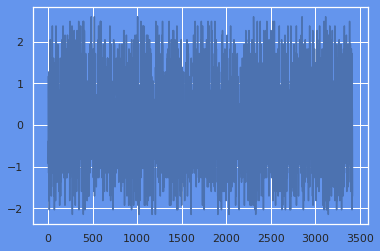

In [55]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)
X_train_ss = pd.DataFrame(X_train_ss, columns = X_train.columns)
X_test_ss = pd.DataFrame(X_test_ss, columns = X_test.columns)
X_train_ss.Age.plot()

In [56]:
X_train_ss.head()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,-0.482486,1.164130,-0.714031,-0.649789,0.128011,0.288123,-0.735866,-1.217370,-0.632714,1.409081,0.781435,-0.219989,0.64769,0.925801,0.810840,-0.863128,-1.815673,-0.863128
1,-0.482486,-0.821583,-0.714031,-0.527737,-1.262231,-0.710529,1.761553,1.504605,-0.632714,1.409081,-1.279697,-0.219989,0.64769,-2.194560,-1.233289,0.947826,0.885726,0.947826
2,2.072599,-0.931900,-0.714031,-0.161582,0.128011,1.286776,1.761553,-0.672975,1.580492,-0.046813,0.781435,-0.219989,0.64769,0.925801,0.810840,0.947826,-0.014740,0.947826
3,-0.482486,-0.931900,1.470853,-0.771841,0.128011,0.288123,0.512843,-0.128580,1.580492,-0.046813,0.781435,0.952257,0.64769,-0.634379,-1.233289,0.042349,0.885726,0.042349
4,-0.482486,-0.380313,-0.714031,-0.527737,0.128011,1.286776,0.512843,2.593396,-0.632714,0.681134,-1.279697,-0.219989,0.64769,-0.634379,-1.233289,0.947826,-0.014740,0.947826


In [60]:
X_train_ss.columns

Index(['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'TypeofContact', 'Occupation', 'Gender',
       'ProductPitched', 'MaritalStatus', 'Designation'],
      dtype='object')

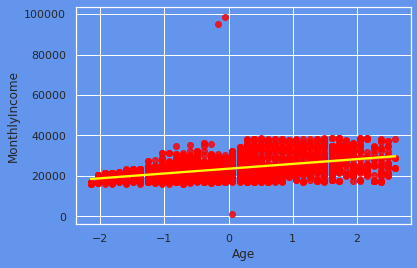

In [61]:
sns.regplot(X_train_ss.Age, y_train, color = 'red', fit_reg = True, line_kws = {'color': 'yellow'});

<AxesSubplot:xlabel='ProdTaken', ylabel='MonthlyIncome'>

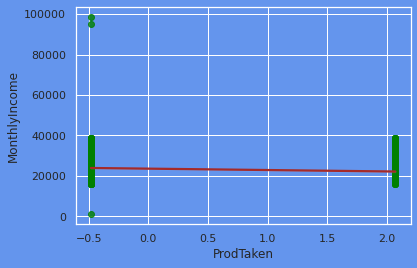

In [62]:
sns.regplot(X_train_ss.ProdTaken, y_train, color = 'green', line_kws = {'color': 'brown'})

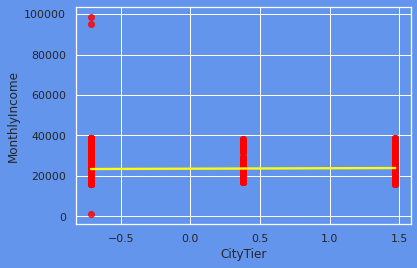

In [63]:
sns.regplot(X_train_ss.CityTier, y_train, color = 'red', fit_reg = True, line_kws = {'color': 'yellow'});

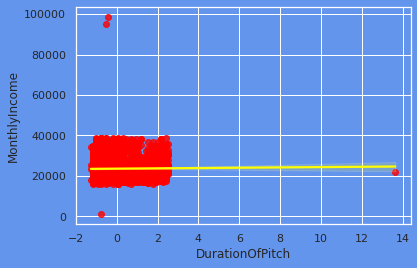

In [64]:
sns.regplot(X_train_ss.DurationOfPitch, y_train, color = 'red', fit_reg = True, line_kws = {'color': 'yellow'});

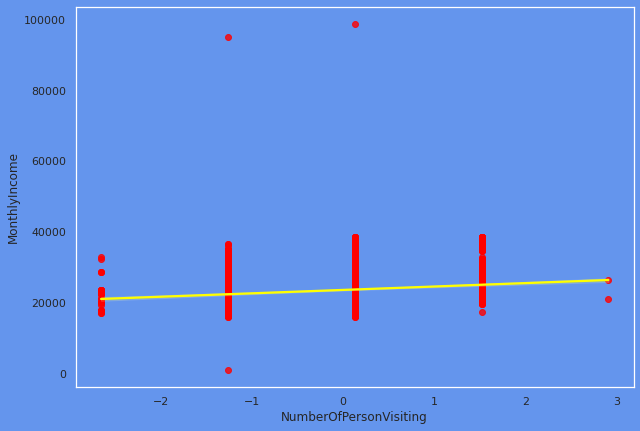

In [65]:
plt.figure(figsize = ( 10, 7))
sns.regplot(X_train_ss.NumberOfPersonVisiting, y_train, color = 'red', fit_reg = True, line_kws = {'color': 'yellow'});
plt.grid()

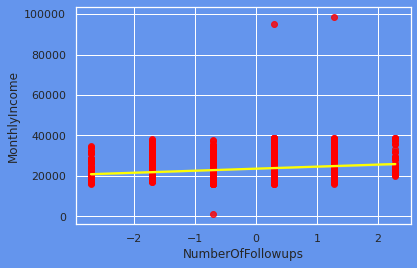

In [66]:
sns.regplot(X_train_ss.NumberOfFollowups, y_train, color = 'red', fit_reg = True, line_kws = {'color': 'yellow'});

The Predicted Variable is : [22363.86721643 23295.12973929 22786.79811186 ... 23644.82601954
 31646.6549912  30176.92476058]

R2_Score : 0.8030030324202779

Mean Squarred Error : 5139030.87087738

Mean Absoluter Error :  1654.7094538497104


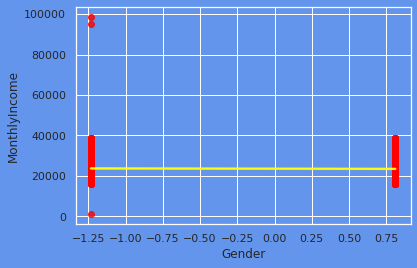

In [67]:

sns.regplot(X_train_ss.Gender, y_train, color = 'red', fit_reg = True, line_kws = {'color': 'yellow'});

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
info = []

def metrics(model, X_train_ss, y_train):
    m = model.fit(X_train_ss, y_train)
    m = m.predict(X_test_ss)
    print("The Predicted Variable is :", m )
    print('')
    print("R2_Score :", r2_score(y_test, m))
    print('')
    print("Mean Squarred Error :", mean_squared_error(y_test, m))
    print('')
    print('Mean Absoluter Error : ', mean_absolute_error(y_test, m))
    info.append([model, r2_score(y_test, m), mean_squared_error(y_test, m), mean_absolute_error(y_test, m)])
    

    
metrics(lr, X_train_ss, y_train)